<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [10]:
!pip install keras-video-generators

  Using cached https://files.pythonhosted.org/packages/d9/98/ff550be6084b0537f1340783a6850a2f2b62b87273472a56c17ed84bcdb3/keras-video-generators-1.0.14.tar.gz
  Created wheel for keras-video-generators: filename=keras_video_generators-1.0.14-cp37-none-any.whl size=12883 sha256=0114d259f4a691e72f22faac68f80cb380702848955a2b47511ffc1304e3f91b
  Stored in directory: /psi/home/rantsiou_e/.cache/pip/wheels/20/b7/76/8674d46fc4777c09e5aa7b065d4e356d90f12ec409a6144bbb
Successfully built keras-video-generators


In [11]:
!pip -V

pip 19.3.1 from /data/user/rantsiou_e/conda_envs/DL_keras2.2.4/lib/python3.7/site-packages/pip (python 3.7)


In [2]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
import keras_video
import matplotlib.pyplot as plt

In [27]:
PARAMS = {'lr': 1e-4,
          'dropout': 0.7,
          'batch_size': 6,
          'n_epochs': 10,
          'optimizer': 'RMSprop',
          'loss': 'categorical_crossentropy',
          'metrics': 'acc',
          'activations': 'relu, softmax',
          'image_input_shape' : (15,213,283,3)
          }

Use constomized DataGenerator (non-funtional at this moment)

Download .py code from here:

https://gist.github.com/Emadeldeen24/736c33ac2af0c00cc48810ad62e1f54a

and then import, e.g.:

from tweaked_ImageGenerator_v2 import ImageDataGenerator


In [3]:

#from tweaked_ImageGenerator_v2 import ImageDataGenerator
#train_datagen = ImageDataGenerator(samplewise_center=True,samplewise_std_normalization=True)
#validation_datagen = ImageDataGenerator(samplewise_center=True,samplewise_std_normalization=True)
#test_datagen = ImageDataGenerator(samplewise_center=True,samplewise_std_normalization=True)


#train = train_datagen.flow_from_directory(
#        '/home/emmanouela/Documents/mosAIc.gr/trimmed_data/train',
#        target_size=(213,283),color_mode='rgb',
#        batch_size=PARAMS['batch_size'],
#        class_mode='categorical',frames_per_step=15) 

#validation = validation_datagen.flow_from_directory(
#        '/home/emmanouela/Documents/mosAIc.gr/trimmed_data/validation',
#        target_size=(213,283),color_mode='rgb',
#        batch_size=PARAMS['batch_size'],
#        class_mode='categorical',frames_per_step=15)


#test = test_datagen.flow_from_directory(
#        '/content/lambda_classification_data/test',
#        target_size=(325, 325),
#        batch_size=PARAMS['batch_size'],
#        class_mode='categorical', color_mode="grayscale")

Found 0 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


Use "keras-videos-generators".
Must be installed first

!pip install keras-video-generators

handy info and examples for these generators here:

https://pypi.org/project/keras-video-generators/

https://medium.com/smileinnovation/training-neural-network-with-image-sequence-an-example-with-video-as-input-c3407f7a0b0f

https://nbviewer.jupyter.org/github/metal3d/keras-video-generators/blob/master/Example%20of%20usage.ipynbf

https://medium.com/smileinnovation/how-to-work-with-time-distributed-data-in-a-neural-network-b8b39aa4ce00

In [25]:
orig_w=640
orig_h=850
ww=np.int(orig_w/3.0)
hh=np.int(orig_h/3.0)
print(ww,hh)

train = keras_video.VideoFrameGenerator(batch_size=PARAMS['batch_size'],nb_frames=15,target_shape=(ww,hh),glob_pattern='/data/user/rantsiou_e/mosAIc.gr_data/medium_dataset_mixed/{classname}/*.mp4', split_val=0.2,split_test=0.1)
valid = train.get_validation_generator()
test = train.get_test_generator()

213 283
class first_contact, validation count: 102, test count: 40, train count: 369
class narrowing, validation count: 123, test count: 49, train count: 446
class stable, validation count: 124, test count: 49, train count: 447
Total data: 3 classes for 1262 files for train
Total data: 3 classes for 349 files for validation
Total data: 3 classes for 138 files for test


In [26]:
for images_batch, labels_batch in valid:
    print('Image batches have shape:', images_batch.shape)
    print('Labes batches have shape:', labels_batch.shape)
    break

Image batches have shape: (6, 15, 283, 213, 3)
Labes batches have shape: (6, 3)


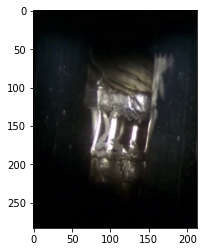

In [19]:
# pick one image from one batch and plot it to check X and Y dimensions are the ones I want and not reversed.

import matplotlib.pyplot as plt
image=images_batch[0,0,:,:,:]
plt.imshow(image)

In [24]:
tensorflow.keras.backend.clear_session()

In [28]:
model = models.Sequential()
model.add(layers.Conv3D(64, (3,3,3), padding='same',activation='relu',
                        input_shape=(15,ww,hh,3)))
model.add(layers.MaxPooling3D((2,2,2),strides=(1,2,2)))
model.add(layers.Conv3D(128, (3, 3,3), padding='same',activation='relu'))
model.add(layers.MaxPooling3D((2,2, 2),strides=(1,2,2)))
model.add(layers.Conv3D(256, (3, 3,3), padding='same',activation='relu'))
model.add(layers.MaxPooling3D((2,2,2),strides=(2,2,2)))
model.add(layers.Conv3D(256, (3, 3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling3D((2,2,2),strides=(2,2,2)))
model.add(layers.Conv3D(256, (3, 3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling3D((2,2,2),strides=(2,2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dropout(PARAMS['dropout']))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [29]:
model.compile(loss=PARAMS['loss'],
              optimizer=optimizers.RMSprop(lr=PARAMS['lr']),
              metrics=[PARAMS['metrics']])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 15, 213, 283, 64)  5248      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 14, 106, 141, 64)  0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 14, 106, 141, 128) 221312    
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 13, 53, 70, 128)   0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 13, 53, 70, 256)   884992    
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 6, 26, 35, 256)    0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 6, 26, 35, 256)    1

In [ ]:
spe = len(train)
val_spe=len(valid)

history = model.fit(
            train,
            steps_per_epoch=spe,
            epochs=PARAMS['n_epochs'],
            validation_data=valid,
            validation_steps=val_spe) 

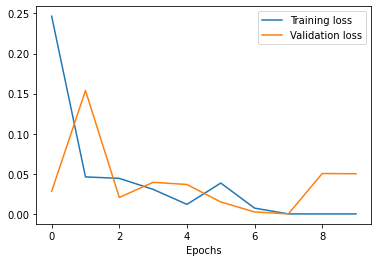

In [27]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()



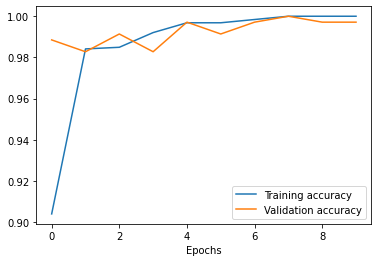

In [28]:
plt.plot(history.history['acc'], label='Training accuracy')
plt.plot(history.history['val_acc'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

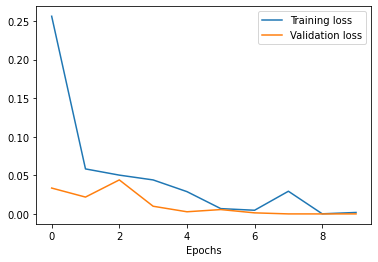

In [10]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

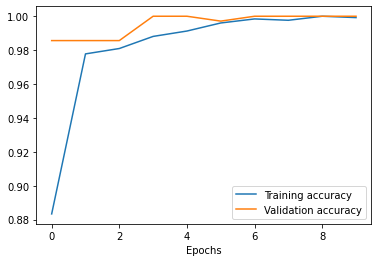

In [11]:
plt.plot(history.history['acc'], label='Training accuracy')
plt.plot(history.history['val_acc'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()